In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('wholesome_customers_data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [7]:
df['Region'].value_counts()

Region
3    316
1     77
2     47
Name: count, dtype: int64

In [3]:
df['Channel'].value_counts()

Channel
1    298
2    142
Name: count, dtype: int64

# EDA

<Axes: xlabel='Milk', ylabel='Grocery'>

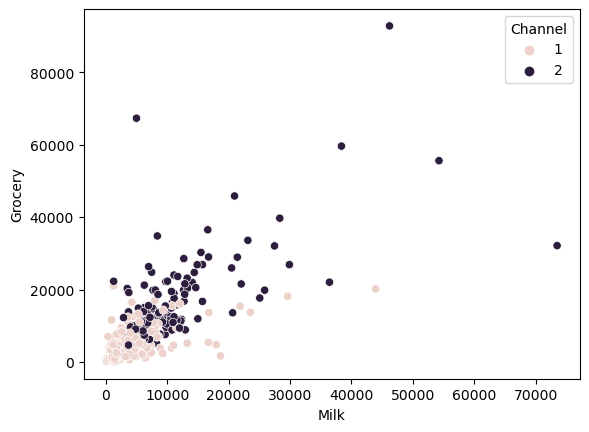

In [4]:
sns.scatterplot(data=df,x='Milk',y='Grocery',hue='Channel')

/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Milk', ylabel='Count'>

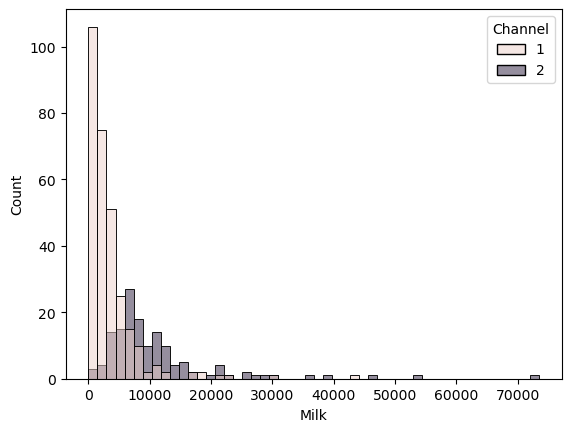

In [5]:
sns.histplot(df,x='Milk', hue='Channel')

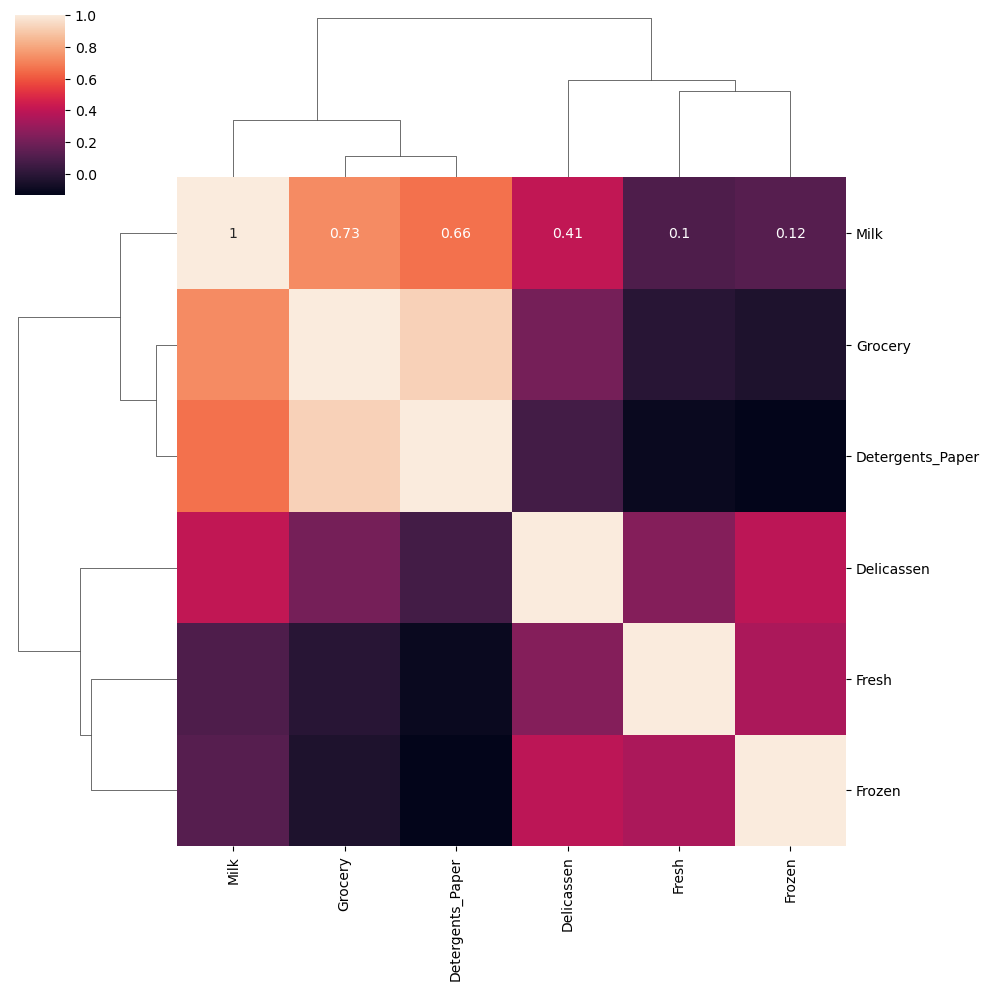

In [6]:
sns.clustermap(df.drop(['Region','Channel'],axis=1).corr(),annot=True)

/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

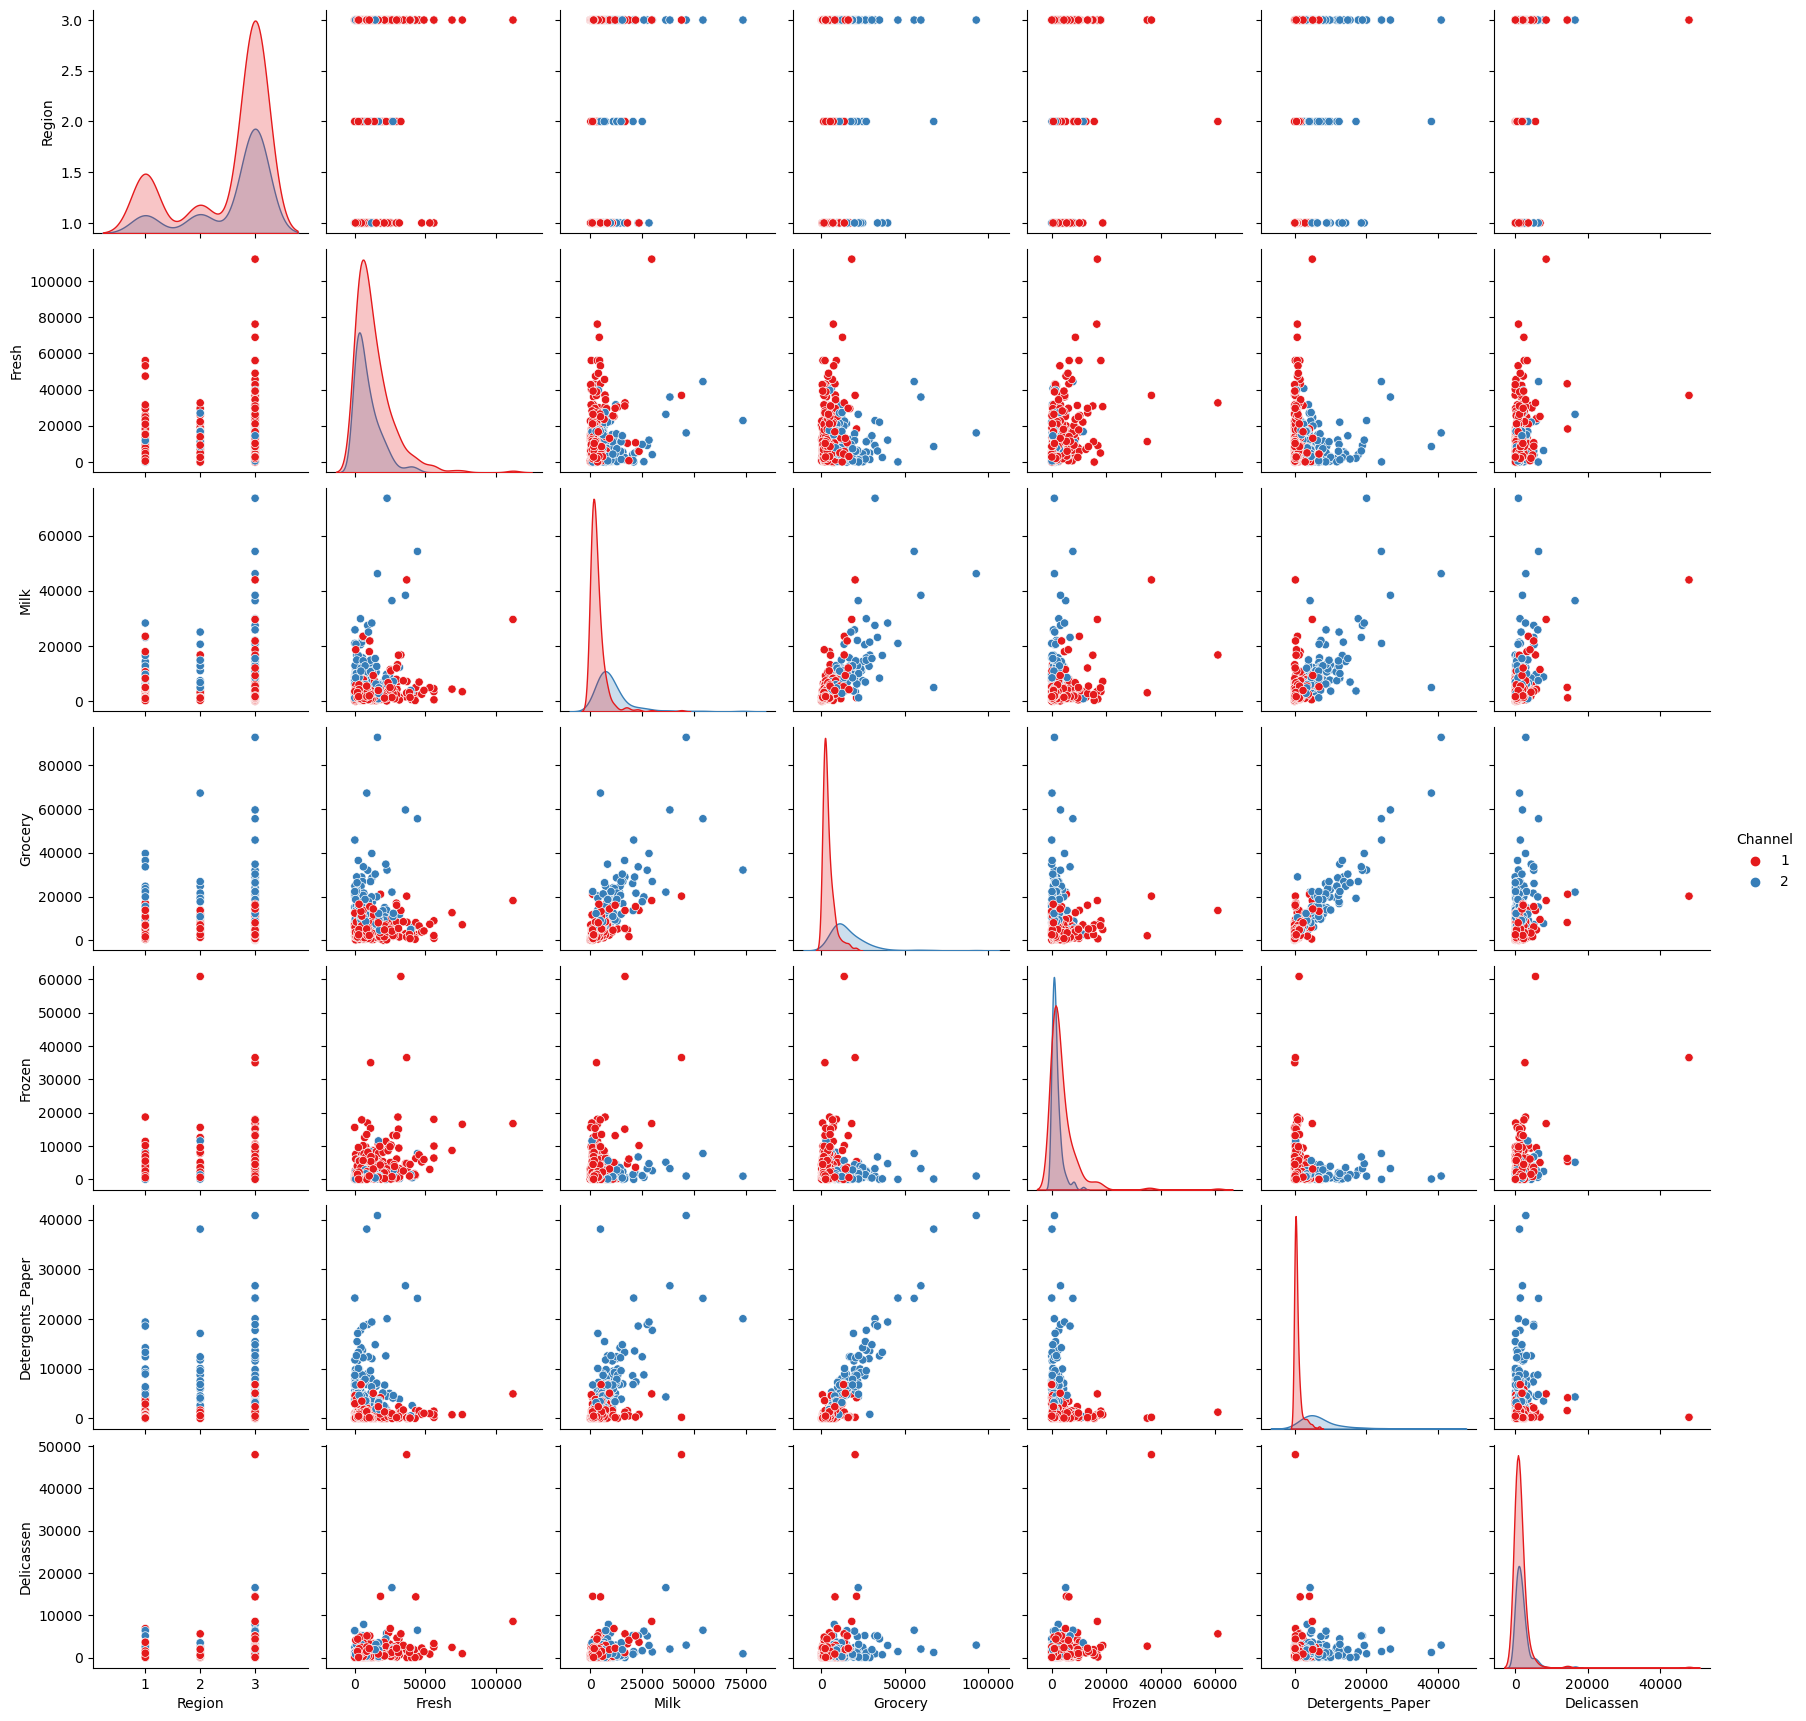

In [11]:
sns.pairplot(df,hue='Channel',palette='Set1')

### DBSCAN

In [12]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc_X = sc.fit_transform(df)

In [13]:
sc_X.shape[1]

8

In [21]:
from sklearn.cluster import DBSCAN

outlier_percent = []

for e in np.linspace(.001,5,100):
    dbscan = DBSCAN(eps=e, min_samples= 2*sc_X.shape[1])
    dbscan.fit(sc_X)
    outlier_percent.append(100*np.sum(dbscan.labels_ == -1)/len(dbscan.labels_))

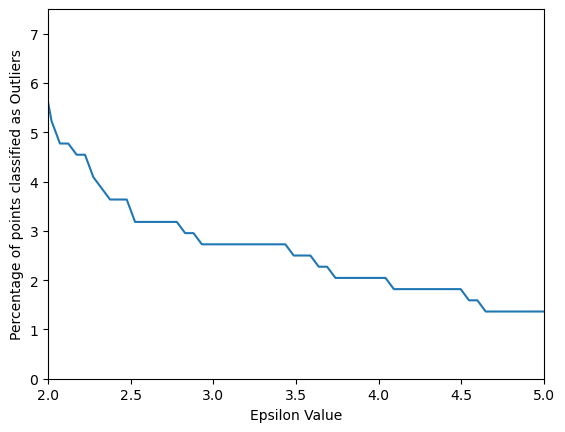

In [25]:
plt.plot(np.linspace(.001,5,100),outlier_percent)
plt.ylabel('Percentage of points classified as Outliers')
plt.xlabel('Epsilon Value')
plt.ylim(0,7.5)
plt.xlim(2,5)
plt.show()

In [33]:
db1 = DBSCAN(eps=2.5,min_samples= 2*sc_X.shape[1])
db1.fit(sc_X)

DBSCAN(eps=2.5, min_samples=16)

<Axes: xlabel='Grocery', ylabel='Milk'>

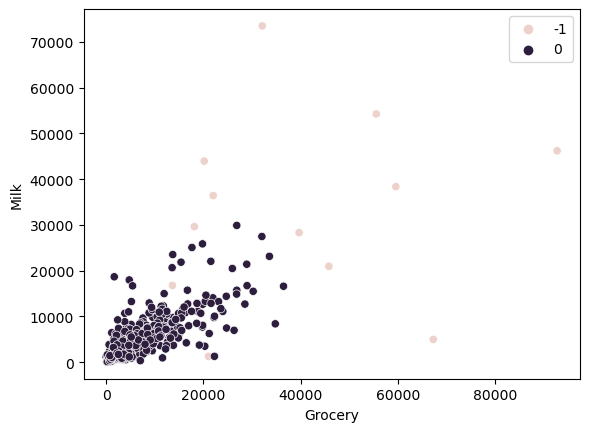

In [34]:
sns.scatterplot(data=df, x='Grocery',y='Milk',hue=db1.labels_)

In [35]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

<Axes: xlabel='Detergents_Paper', ylabel='Milk'>

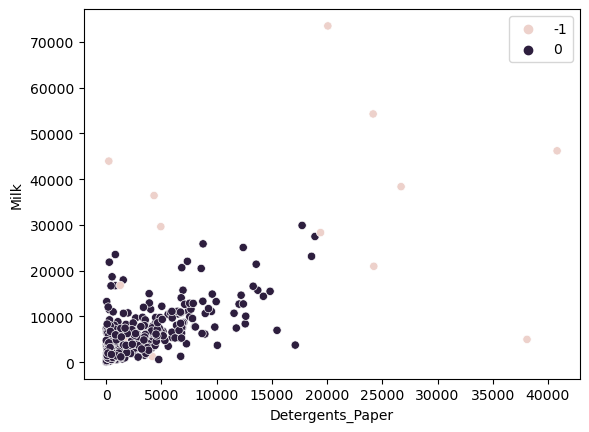

In [36]:
sns.scatterplot(data=df, x='Detergents_Paper',y='Milk',hue=db1.labels_)